<a href="https://colab.research.google.com/github/fidelis2025/stankelly-website/blob/main/Dahir_Decision_Trees_and_GAMs_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive Mounting and Data Uploading

In [ ]:
# Step 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Step 1: Upload file manually
from google.colab import files
import pandas as pd

uploaded = files.upload()  # This lets you pick file from your PC
file_path = list(uploaded.keys())[0]  # Automatically use uploaded filename

# Step 2: Read dataset
# Use pd.read_excel for .xlsx files
data = pd.read_excel(file_path)
print("5G_Datasets (first 5 rows):")
print(data.head())

Saving Dahir Dataset.xlsx to Dahir Dataset.xlsx
5G_Datasets (first 5 rows):
   Years       FDI        GDP  Unemployment  Inflation
0   1991 -0.020892   2.950571     12.684379  35.529014
1   1992 -0.008459  -8.488323     12.684379  25.000504
2   1993  0.158713   3.990596     12.684379  54.663487
3   1994  0.067513 -17.846989     12.684379  55.814745
4   1995  0.065157   3.990596     11.722000  31.499997


In [ ]:
pip install pandas numpy scikit-learn matplotlib seaborn openpyxl pygam joblib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.2/80.2 kB 2.9 MB/s eta 0:00:00


Model Fitting

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Years         33 non-null     int64  
 1   FDI           33 non-null     float64
 2   GDP           33 non-null     float64
 3   Unemployment  33 non-null     float64
 4   Inflation     33 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 1.4 KB
Data shape (33, 5)
   Years       FDI        GDP  Unemployment  Inflation
0   1991 -0.020892   2.950571     12.684379  35.529014
1   1992 -0.008459  -8.488323     12.684379  25.000504
2   1993  0.158713   3.990596     12.684379  54.663487
3   1994  0.067513 -17.846989     12.684379  55.814745
4   1995  0.065157   3.990596     11.722000  31.499997


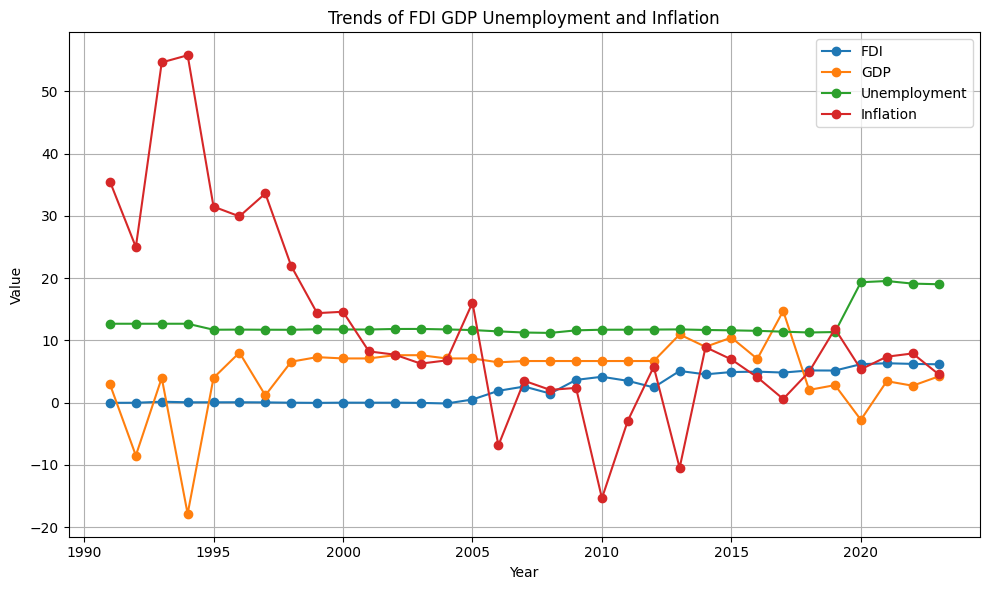

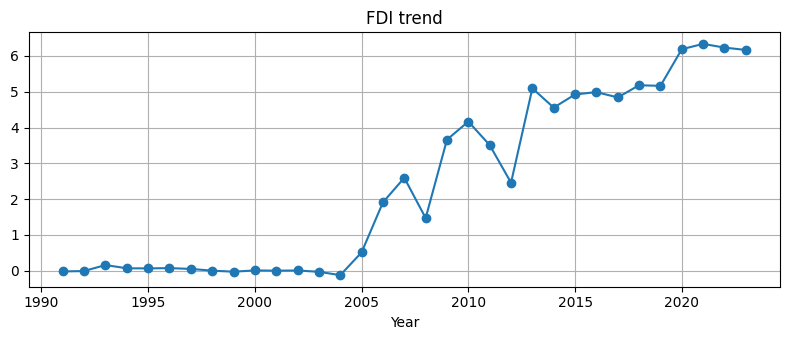

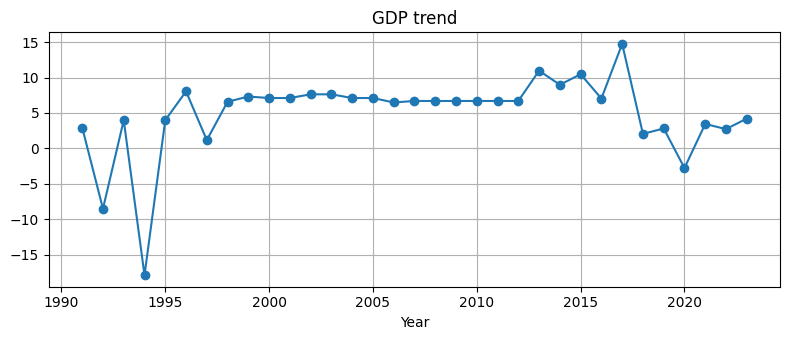

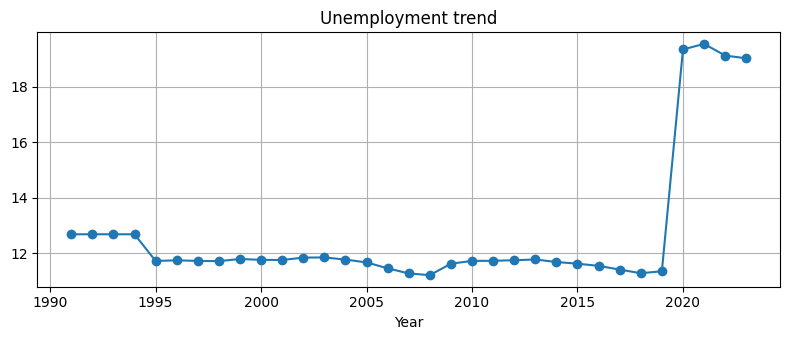

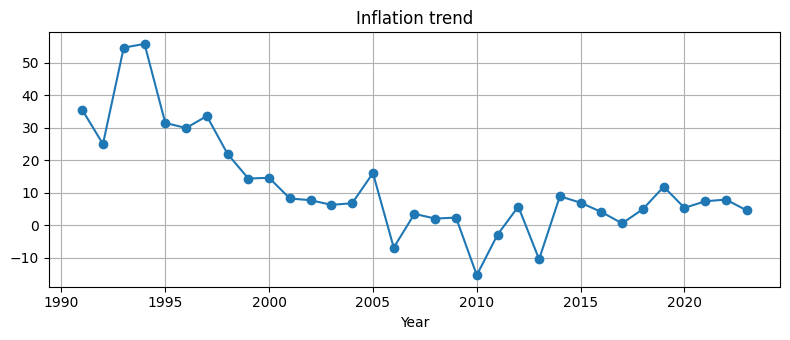

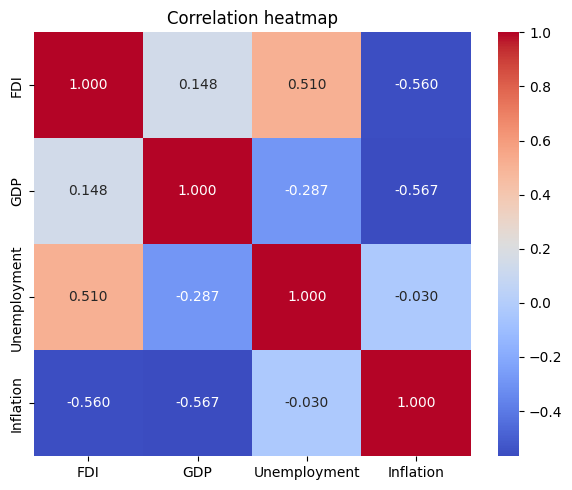

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00



Decision Tree test performance
DT GDP MSE: 74.464912 RMSE: 8.629305 R2: -2.104472
DT Unemployment MSE: 32.147438 RMSE: 5.669871 R2: -1.090635
DT Inflation MSE: 272.969628 RMSE: 16.521793 R2: -25.343074

GAM test performance and GCV
GAM GDP MSE: 65.146764 RMSE: 8.071355 R2: -1.715995
GAM GDP GCV: 37.425910
GAM Unemployment MSE: 33.022996 RMSE: 5.746564 R2: -1.147575
GAM Unemployment GCV: 0.157683
GAM Inflation MSE: 197.380476 RMSE: 14.049216 R2: -18.048304
GAM Inflation GCV: 238.029646

Training R squares
DT train R2 GDP: 1.0000
GAM train R2 GDP: 0.1420
DT train R2 Unemployment: 1.0000
GAM train R2 Unemployment: 0.2546
DT train R2 Inflation: 1.0000
GAM train R2 Inflation: 0.4012


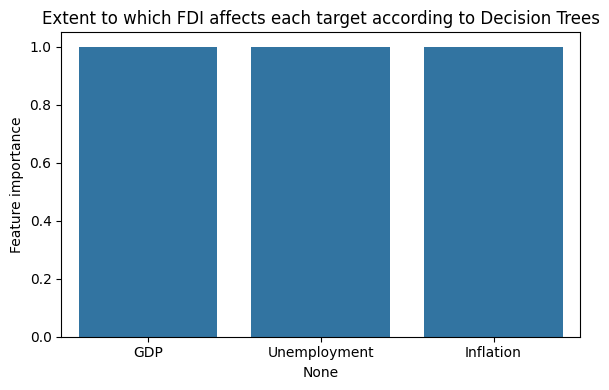

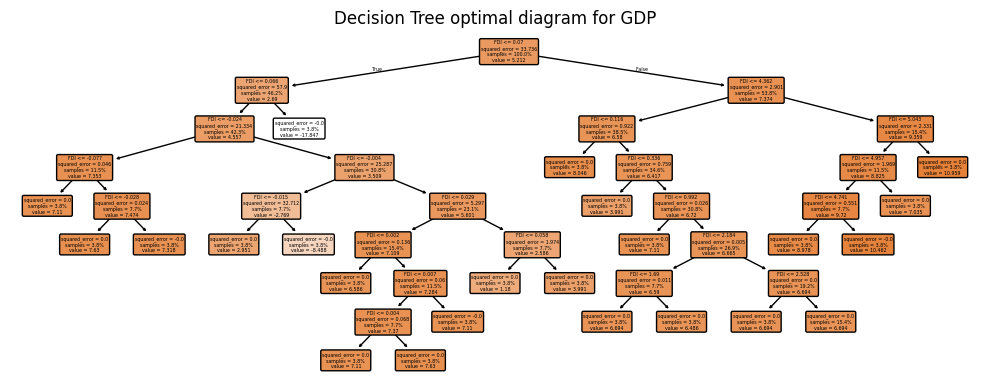

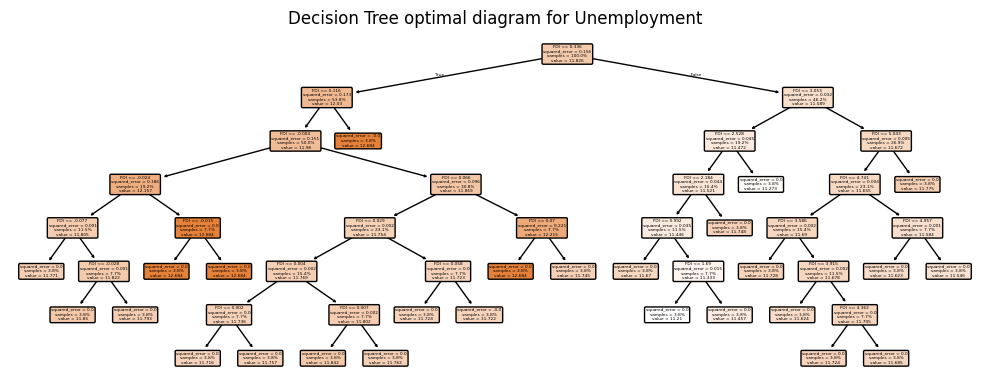

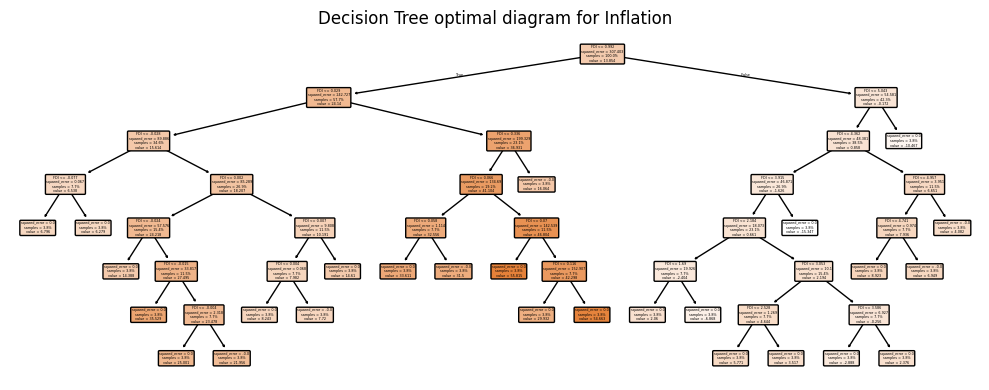


Confusion matrix for GDP using Decision Tree predictions (binned into 3 quantiles)
[[0 0 2]
 [0 0 2]
 [0 0 3]]


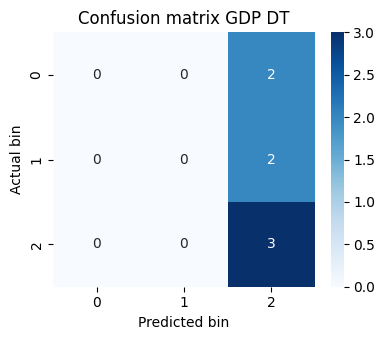


Confusion matrix for Unemployment using Decision Tree predictions (binned into 3 quantiles)
[[0 2 0]
 [0 2 0]
 [0 3 0]]


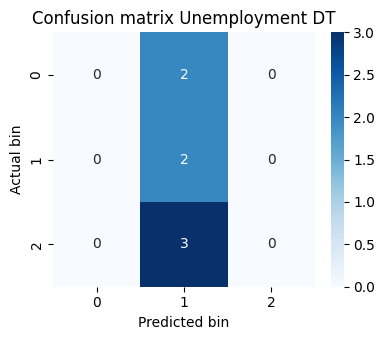


Confusion matrix for Inflation using Decision Tree predictions (binned into 3 quantiles)
[[1 1 0]
 [2 0 0]
 [3 0 0]]


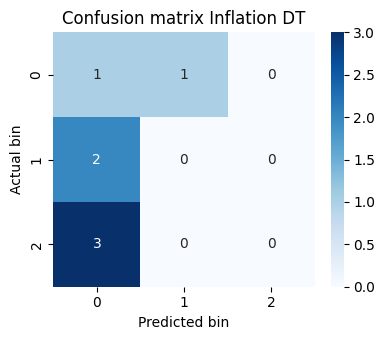


GAM summary for GDP
LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                      2.2393
Link Function:                     IdentityLink Log Likelihood:                                  -114.1091
Number of Samples:                           26 AIC:                                              234.6968
                                                AICc:                                             235.9589
                                                GCV:                                               37.4259
                                                Scale:                                             31.6724
                                                Pseudo R-Squared:                                    0.142
Feature Function

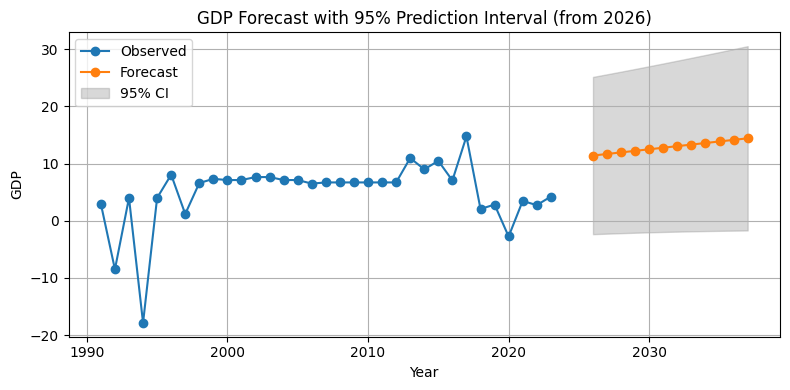

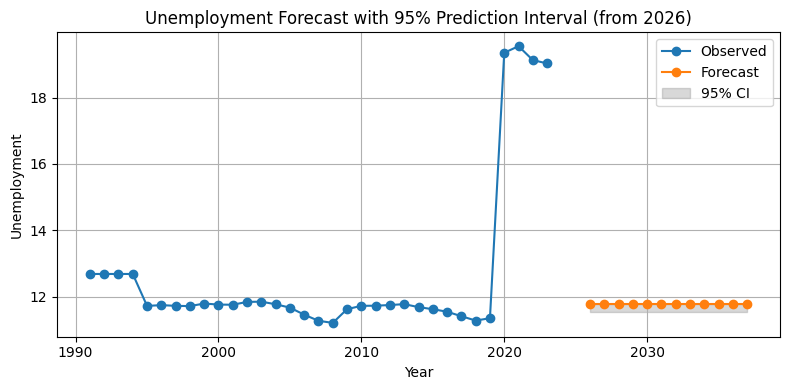

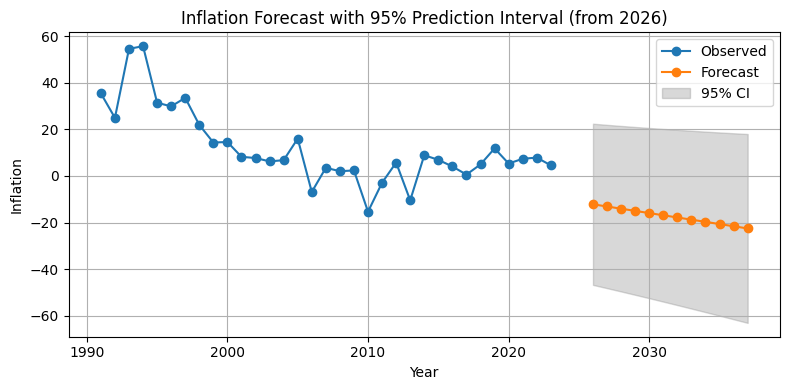


Model comparison summary
         Target      DT_MSE    DT_RMSE      DT_R2     GAM_MSE   GAM_RMSE  \
0           GDP   74.464912   8.629305  -2.104472   65.146764   8.071355   
1  Unemployment   32.147438   5.669871  -1.090635   33.022996   5.746564   
2     Inflation  272.969628  16.521793 -25.343074  197.380476  14.049216   

      GAM_R2     GAM_GCV  
0  -1.715995   37.425910  
1  -1.147575    0.157683  
2 -18.048304  238.029646  

Completed. Outputs saved as model_comparison_summary.csv and forecast_results.csv


In [ ]:
# File: fdi_macro_analysis.py
# Purpose: Decision tree and GAM analysis with forecasting and diagnostics
# Note: update file_path if needed

import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, classification_report
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import KBinsDiscretizer, StandardScaler
from sklearn.utils import resample
from pygam import LinearGAM, s
import math
import joblib

# Step 2: Read dataset (already uploaded via files.upload())
file_path = "Dahir Dataset.xlsx"
df = pd.read_excel(file_path)

# Check dataset structure
data.info()

# ensure proper types and sort by year
df['Years'] = df['Years'].astype(int)
df = df.sort_values('Years').reset_index(drop=True)

# quick view
print("Data shape", df.shape)
print(df.head())

# -------------------------
# exploratory plots
# -------------------------
plt.figure(figsize=(10, 6))
plt.plot(df['Years'], df['FDI'], marker='o', label='FDI')
plt.plot(df['Years'], df['GDP'], marker='o', label='GDP')
plt.plot(df['Years'], df['Unemployment'], marker='o', label='Unemployment')
plt.plot(df['Years'], df['Inflation'], marker='o', label='Inflation')
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Trends of FDI GDP Unemployment and Inflation')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# individual trend plots for clarity
for col in ['FDI', 'GDP', 'Unemployment', 'Inflation']:
    plt.figure(figsize=(8, 3.5))
    plt.plot(df['Years'], df[col], marker='o')
    plt.xlabel('Year')
    plt.title(f'{col} trend')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# -------------------------
# correlation heatmap
# -------------------------
corr = df[['FDI', 'GDP', 'Unemployment', 'Inflation']].corr()
plt.figure(figsize=(6, 5))
sns.heatmap(corr, annot=True, fmt=".3f", cmap='coolwarm')
plt.title('Correlation heatmap')
plt.tight_layout()
plt.show()

# -------------------------
# training test split
# use chronological split to respect time ordering
# reserve last 20 percent of years for test
# -------------------------
n = len(df)
test_size = max(1, int(np.ceil(0.2 * n)))
train_df = df.iloc[:-test_size].reset_index(drop=True)
test_df = df.iloc[-test_size:].reset_index(drop=True)

X_train = train_df[['FDI']].values
X_test = test_df[['FDI']].values
y_train = train_df[['GDP', 'Unemployment', 'Inflation']].values
y_test = test_df[['GDP', 'Unemployment', 'Inflation']].values

# standardize predictors for GAMs
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

# -------------------------
# Decision tree regressors: train separate tree for each target
# -------------------------
targets = ['GDP', 'Unemployment', 'Inflation']
dt_models = {}
dt_preds_test = np.zeros_like(y_test, dtype=float)
dt_train_preds = np.zeros_like(y_train, dtype=float)

for i, t in enumerate(targets):
    dt = DecisionTreeRegressor(random_state=42)
    dt.fit(X_train, y_train[:, i])
    dt_models[t] = dt
    dt_preds_test[:, i] = dt.predict(X_test)
    dt_train_preds[:, i] = dt.predict(X_train)
    # save model
    joblib.dump(dt, f'dt_{t}.joblib')

# -------------------------
# GAM models using pygam
# -------------------------
gam_models = {}
gam_preds_test = np.zeros_like(y_test, dtype=float)
gcv_scores = {}

for i, t in enumerate(targets):
    # use a small grid for smoothing selection via default gridsearch
    gam = LinearGAM(s(0, n_splines=20)).gridsearch(X_train_s, y_train[:, i])
    gam_models[t] = gam
    gam_preds_test[:, i] = gam.predict(X_test_s)
    gcv_scores[t] = gam.statistics_['GCV']
    # save model
    joblib.dump(gam, f'gam_{t}.joblib')

# -------------------------
# evaluation function
# -------------------------
def print_metrics(name, y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = math.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f"{name} MSE: {mse:.6f} RMSE: {rmse:.6f} R2: {r2:.6f}")
    return mse, rmse, r2

print("\nDecision Tree test performance")
dt_metrics = {}
for i, t in enumerate(targets):
    dt_metrics[t] = print_metrics(f"DT {t}", y_test[:, i], dt_preds_test[:, i])

print("\nGAM test performance and GCV")
gam_metrics = {}
for i, t in enumerate(targets):
    gam_metrics[t] = print_metrics(f"GAM {t}", y_test[:, i], gam_preds_test[:, i])
    print(f"GAM {t} GCV: {gcv_scores[t]:.6f}")

# -------------------------
# R squared on training for context
# -------------------------
print("\nTraining R squares")
for i, t in enumerate(targets):
    print(f"DT train R2 {t}: {r2_score(y_train[:, i], dt_train_preds[:, i]):.4f}")
    print(f"GAM train R2 {t}: {r2_score(y_train[:, i], gam_models[t].predict(X_train_s)):.4f}")

# -------------------------
# feature importance plot showing extent to which FDI affects each target
# since only FDI is the predictor the per target importance is just from that tree
# we collect feature_importances_[0] across models to show relative effect
# -------------------------
importances = {t: dt_models[t].feature_importances_[0] for t in targets}
imp_df = pd.DataFrame.from_dict(importances, orient='index', columns=['FDI_importance'])
imp_df = imp_df.sort_values('FDI_importance', ascending=False)

plt.figure(figsize=(6, 4))
sns.barplot(x=imp_df.index, y='FDI_importance', data=imp_df)
plt.ylabel('Feature importance')
plt.title('Extent to which FDI affects each target according to Decision Trees')
plt.tight_layout()
plt.show()

# -------------------------
# plot optimal tree diagrams for each target
# -------------------------
for t in targets:
    plt.figure(figsize=(10, 4))
    plot_tree(dt_models[t], feature_names=['FDI'], filled=True, rounded=True, proportion=True)
    plt.title(f'Decision Tree optimal diagram for {t}')
    plt.tight_layout()
    plt.show()

# -------------------------
# classification style confusion matrix for binned values
# we bin actual and predicted into three quantiles Low Medium High
# this provides a confusion matrix based view of model error
# -------------------------
def confusion_matrix_binned(y_true_col, y_pred_col, labels=None):
    kb = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='quantile')
    true_bins = kb.fit_transform(y_true_col.reshape(-1, 1)).astype(int).ravel()
    pred_bins = kb.transform(y_pred_col.reshape(-1, 1)).astype(int).ravel()
    cm = confusion_matrix(true_bins, pred_bins)
    return cm, kb

for i, t in enumerate(targets):
    cm, kb = confusion_matrix_binned(y_test[:, i], dt_preds_test[:, i])
    print(f"\nConfusion matrix for {t} using Decision Tree predictions (binned into 3 quantiles)")
    print(cm)
    plt.figure(figsize=(4, 3.5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted bin')
    plt.ylabel('Actual bin')
    plt.title(f'Confusion matrix {t} DT')
    plt.tight_layout()
    plt.show()

# -------------------------
# model parameter coefficients for GAMs and tree details
# -------------------------
for t in targets:
    print(f"\nGAM summary for {t}")
    print(gam_models[t].summary())
    print(f"GAM coefficients for {t}:\n{gam_models[t].coef_}")

    print(f"\nDecision Tree parameters for {t}")
    print(dt_models[t].get_params())

# -------------------------
# Decide best model per target based on RMSE
# -------------------------
best_model_choice = {}
for i, t in enumerate(targets):
    dt_rmse = dt_metrics[t][1]
    gam_rmse = gam_metrics[t][1]
    if gam_rmse <= dt_rmse:
        best_model_choice[t] = ('GAM', gam_models[t])
    else:
        best_model_choice[t] = ('DT', dt_models[t])
    print(f"Best model for {t}: {best_model_choice[t][0]}")

# -------------------------
# Forecast FDI for next 12 years starting 2026
# we use a simple linear projection of FDI versus Year
# -------------------------
future_years = np.arange(2026, 2026 + 12)
lr = LinearRegression()
lr.fit(df[['Years']].values, df['FDI'].values)
fdi_forecast = lr.predict(future_years.reshape(-1, 1))

fcast_df = pd.DataFrame({
    'Year': future_years,
    'FDI_forecast': fdi_forecast
})
print("\nFDI forecast for next 12 years (linear projection):")
print(fcast_df)

# scale for GAM inputs
fdi_forecast_s = scaler.transform(fdi_forecast.reshape(-1, 1))

# -------------------------
# Forecast targets using best models and produce 95 percent intervals
# for GAM use prediction_intervals
# for DecisionTree use bootstrap to build intervals
# -------------------------
def bootstrap_prediction_intervals(dt_model, X_train_local, y_train_local, X_new, n_boot=500, alpha=0.05):
    preds = np.zeros((n_boot, X_new.shape[0]))
    rng = np.random.RandomState(42)
    n = X_train_local.shape[0]
    for b in range(n_boot):
        # resample rows with replacement
        idx = rng.choice(n, n, replace=True)
        Xb = X_train_local[idx]
        yb = y_train_local[idx]
        m = DecisionTreeRegressor(random_state=42)
        m.fit(Xb, yb)
        preds[b, :] = m.predict(X_new).ravel()
    lower = np.percentile(preds, 100 * (alpha / 2), axis=0)
    upper = np.percentile(preds, 100 * (1 - alpha / 2), axis=0)
    point = np.median(preds, axis=0)
    return point, lower, upper

forecast_results = {'Year': future_years}
for i, t in enumerate(targets):
    model_type, model_obj = best_model_choice[t]
    if model_type == 'GAM':
        pred = model_obj.predict(fdi_forecast_s)
        pi = model_obj.prediction_intervals(fdi_forecast_s, width=0.95)
        lower, upper = pi[:, 0], pi[:, 1]
        forecast_results[f'{t}_pred'] = pred
        forecast_results[f'{t}_lower'] = lower
        forecast_results[f'{t}_upper'] = upper
    else:
        # Decision tree
        X_new = fdi_forecast.reshape(-1, 1)
        point, lower, upper = bootstrap_prediction_intervals(model_obj, X_train, y_train[:, i].reshape(-1, 1), X_new, n_boot=500)
        forecast_results[f'{t}_pred'] = point
        forecast_results[f'{t}_lower'] = lower
        forecast_results[f'{t}_upper'] = upper

forecast_df = pd.DataFrame(forecast_results)
print("\nForecast summary next 12 years using best models")
print(forecast_df)

# -------------------------
# Plot forecasts with 95 percent intervals for each target
# -------------------------
for t in targets:
    plt.figure(figsize=(8, 4))
    plt.plot(df['Years'], df[t], label='Observed', marker='o')
    plt.plot(forecast_df['Year'], forecast_df[f'{t}_pred'], label='Forecast', marker='o')
    plt.fill_between(forecast_df['Year'], forecast_df[f'{t}_lower'], forecast_df[f'{t}_upper'], color='gray', alpha=0.3, label='95% CI')
    plt.xlabel('Year')
    plt.ylabel(t)
    plt.title(f'{t} Forecast with 95% Prediction Interval (from 2026)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# -------------------------
# print final RMSE MSE R squared table for both model types on test data
# -------------------------
summary_rows = []
for i, t in enumerate(targets):
    dt_mse, dt_rmse, dt_r2 = dt_metrics[t]
    gam_mse, gam_rmse, gam_r2 = gam_metrics[t]
    summary_rows.append({
        'Target': t,
        'DT_MSE': dt_mse, 'DT_RMSE': dt_rmse, 'DT_R2': dt_r2,
        'GAM_MSE': gam_mse, 'GAM_RMSE': gam_rmse, 'GAM_R2': gam_r2,
        'GAM_GCV': gcv_scores[t]
    })
summary_table = pd.DataFrame(summary_rows)
print("\nModel comparison summary")
print(summary_table)

# save summary table
summary_table.to_csv('model_comparison_summary.csv', index=False)
forecast_df.to_csv('forecast_results.csv', index=False)

print("\nCompleted. Outputs saved as model_comparison_summary.csv and forecast_results.csv")